In [1]:
#Gabriel Maldonado ID: 801071135
#Homework #2

#https://github.com/Gmaldonad17/4105-Machine-Learning/tree/main/HW2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import seaborn as sns

def matrix_print(cnf_matrix):
    class_names = [0,1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1) 
    plt.ylabel('Actual label') 
    plt.xlabel('Predicted label')

In [4]:
from sklearn import metrics 

def metrics_print(y_pred):
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

In [5]:
raw_data = pd.read_csv('Data/diabetes.csv')
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
varlist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
raw_x = raw_data[varlist]
raw_y = raw_data['Outcome']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(raw_x, raw_y, test_size = 0.20, random_state = 12)

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [8]:
#Problem 1: 

In [9]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
LR_classifier.fit(x_train, y_train)

LogisticRegression()

In [10]:
#Prints out the predictions from the Logistic Regression Model
LR_y_pred = LR_classifier.predict(x_test)
print("Y Prediction: \n", LR_y_pred)

Y Prediction: 
 [0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0]


In [11]:
from sklearn.metrics import confusion_matrix

#Creates Logistic Regression Confusion Matrix
LR_matrix = confusion_matrix(y_test, LR_y_pred)
print("LR_Matrix: \n\n", LR_matrix)

LR_Matrix: 

 [[91  8]
 [21 34]]


In [12]:
#Prints Metrics for problem 1
print("Logistic Regression Metrics: \n")
metrics_print(LR_y_pred)

Logistic Regression Metrics: 

Accuracy: 0.8116883116883117
Precision: 0.8095238095238095
Recall: 0.6181818181818182


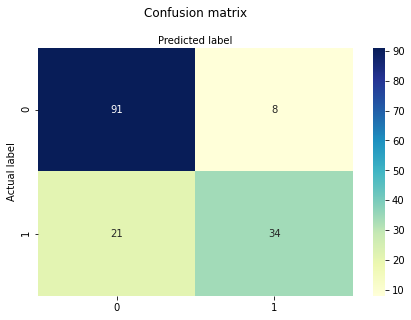

In [13]:
#Prints Confusion Matrix for problem 1
matrix_print(LR_matrix)

In [14]:
#Problem 2

In [15]:
from sklearn.naive_bayes import GaussianNB

NB_classifier = GaussianNB()
NB_classifier.fit(x_train, y_train)

GaussianNB()

In [16]:
#Prints out the predictions from the Logistic Regression Model
NB_y_pred = NB_classifier.predict(x_test)
print("Y Prediction: \n", NB_y_pred)

Y Prediction: 
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 1 0 0]


In [17]:
#Creates the Naive Bayes Confusion Matrix
NB_matrix = confusion_matrix (y_test, NB_y_pred)
print("NB_Matrix: \n\n", NB_matrix)

NB_Matrix: 

 [[89 10]
 [22 33]]


In [18]:
#Prints Metrics for problem 2
print("Naive Bayes Metrics: \n")
metrics_print(NB_y_pred)

Naive Bayes Metrics: 

Accuracy: 0.7922077922077922
Precision: 0.7674418604651163
Recall: 0.6


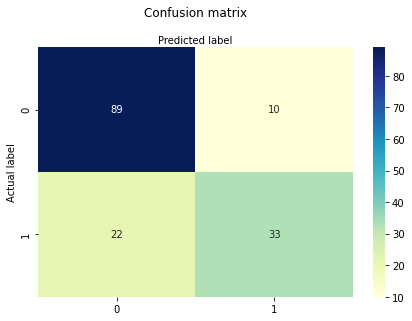

In [19]:
#Prints Confusion Matrix for problem 1
matrix_print(NB_matrix)

In [20]:
#Problem 3:

In [21]:
from sklearn.model_selection import cross_val_score

K5_scores = cross_val_score(LR_classifier, x_train, y_train, cv = 5)
K10_scores = cross_val_score(LR_classifier, x_train, y_train, cv = 10)

print("Five K-folds Scores: \n", K5_scores)
print("\nTen K-folds Scores: \n", K10_scores)

Five K-folds Scores: 
 [0.77235772 0.78861789 0.75609756 0.76422764 0.7295082 ]

Ten K-folds Scores: 
 [0.75806452 0.83870968 0.83870968 0.72580645 0.72131148 0.75409836
 0.7704918  0.72131148 0.72131148 0.72131148]


In [22]:
#Problem 4:
#It does not make sense to use K-Folds on Naive Bayes because there is no training of the data
#The model works on prediction values and probablity based on the data infront of it.
#If the data is split between training and testing it will only slightly change the probablity.

In [23]:
NB_scores = cross_val_score(NB_classifier, x_train, y_train, cv = 5)
print("Naive Bayes K-fold Scores: \n", NB_scores)

Naive Bayes K-fold Scores: 
 [0.74796748 0.76422764 0.71544715 0.74796748 0.73770492]
